In [249]:
import torch
import pandas as pd
import plotnine as pn

import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")
from misc.util import encoders_to_df, load_encoders
from misc.vis import numeric_col_to_categorical

In [250]:
torch.set_printoptions(sci_mode=False)
encoders = torch.load("/Users/nathanielimel/uci/projects/ibsg/multirun/states=10/signals=10/prior=-8/dist=squared_dist/meaning_certainty=0/dynamics=two_population_rd/population_size=None/num_trials=8/seed=42/discr_need=-3.0/final_encoders.pt")

In [251]:
encoders[0][2]

tensor([0.0739, 0.0207, 0.1589, 0.0709, 0.1100, 0.1168, 0.1115, 0.1007, 0.1357,
        0.1010])

In [252]:
encoder = encoders[2]
# encoders_singleton = torch.stack([encoder])

# Reshape data into tidydata
num_meanings, num_words = encoder.shape
meanings = torch.tensor([[i] * num_words for i in range(num_meanings)]).flatten()
words = torch.tensor(list(range(num_words)) * num_meanings)

data = torch.stack([meanings, words, encoder.flatten()]).T

data = pd.DataFrame(data, columns=["meanings", "words", "p"])
data

,meanings,words,p
0,0.000,0.000,0.100
1,0.000,1.000,0.100
2,0.000,2.000,0.100
3,0.000,3.000,0.100
4,0.000,4.000,0.100
...,...,...,...
95,9.000,5.000,0.100
96,9.000,6.000,0.100
97,9.000,7.000,0.100
98,9.000,8.000,0.100


In [253]:

# data = numeric_col_to_categorical(data, "meanings")
data = numeric_col_to_categorical(data, "words")

In [254]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data

,meanings,words,p
0,0.000,0,0.100
1,0.000,1,0.100
2,0.000,2,0.100
3,0.000,3,0.100
4,0.000,4,0.100
...,...,...,...
95,9.000,5,0.100
96,9.000,6,0.100
97,9.000,7,0.100
98,9.000,8,0.100


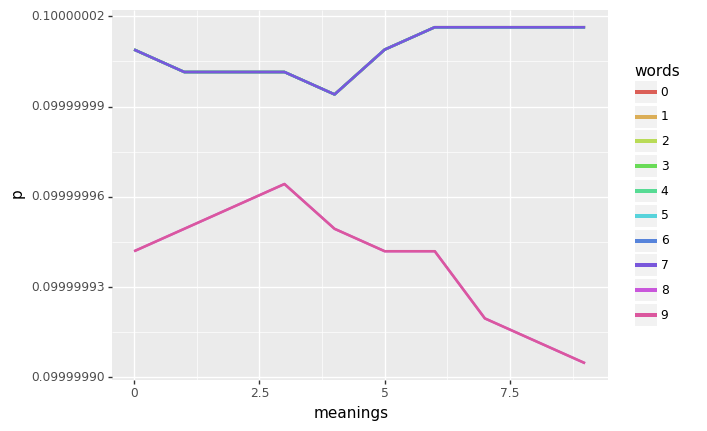

<ggplot: (359936295)>

In [255]:
(
    pn.ggplot(data, pn.aes(x="meanings", y="p"))
    + pn.geom_line(
     mapping=pn.aes(
        color="words",
        ),

     size=1,
    )
)

1


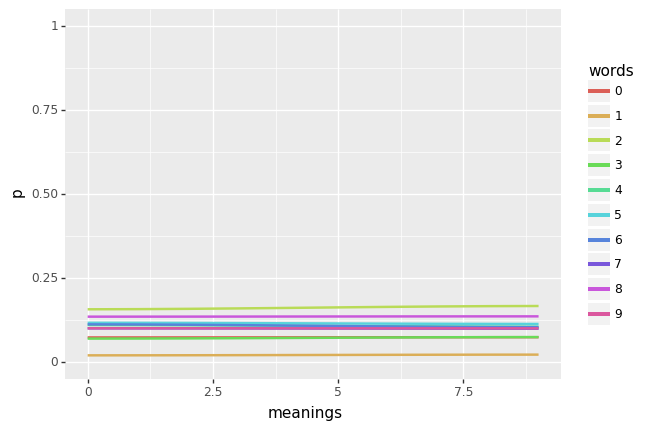


2


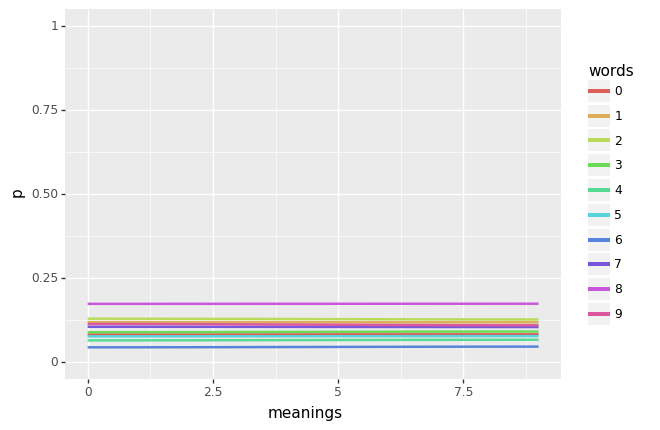


3


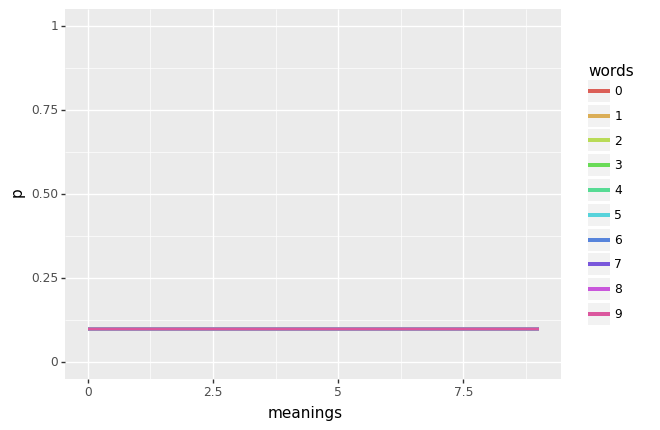


4


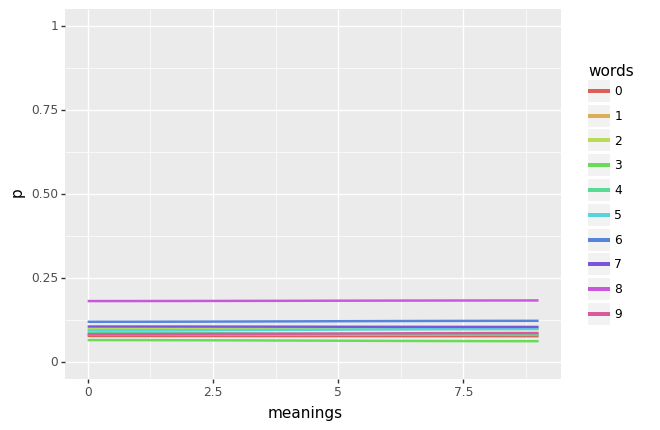


5


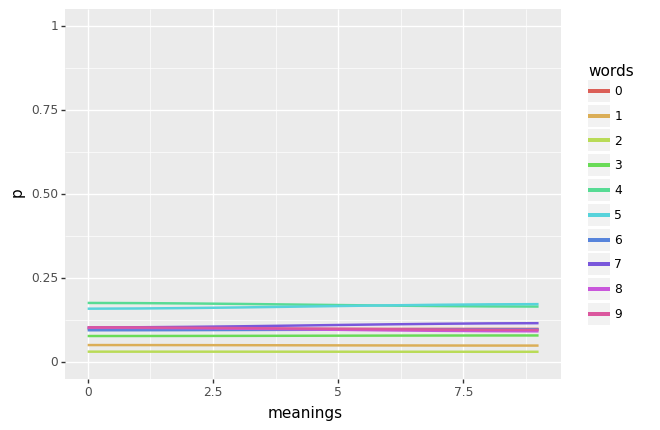


6


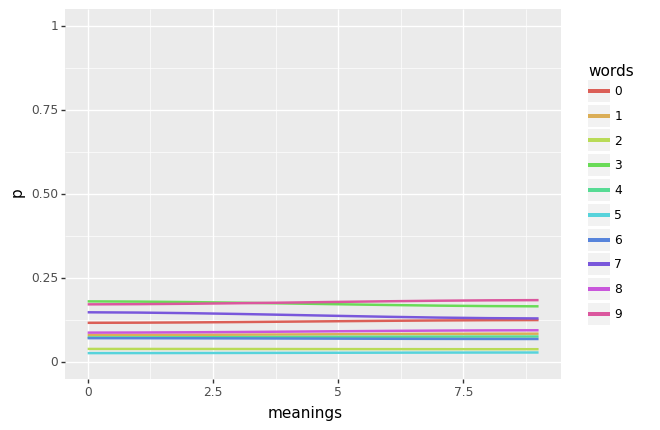


7


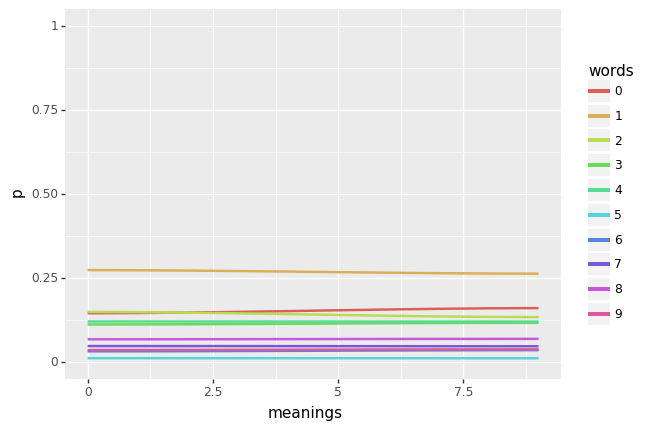


8


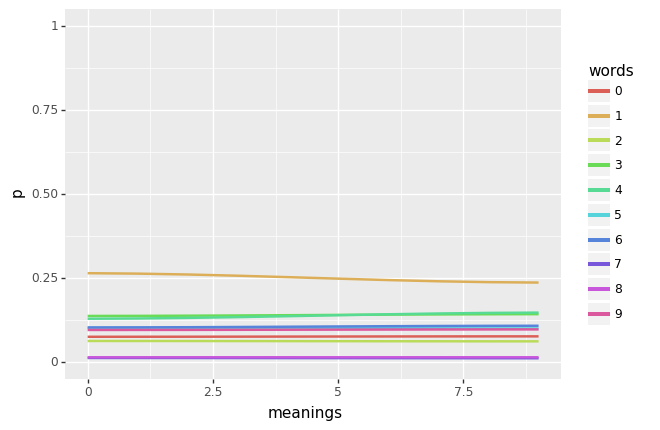

In [256]:
# Now for each encoder
def freq_plot(df):
    return (
        pn.ggplot(df, pn.aes(x="meanings", y="p"))
        + pn.geom_line(
        mapping=pn.aes(
            color="words",
            ),
        size=1,
        )
        + pn.ylim([0,1])
    )

def to_df(t):
    # Reshape data into tidydata
    num_meanings, num_words = t.shape
    meanings = torch.tensor([[i] * num_words for i in range(num_meanings)]).flatten()
    words = torch.tensor(list(range(num_words)) * num_meanings)
    data = torch.stack([meanings, words, encoder.flatten()]).T
    data = pd.DataFrame(data, columns=["meanings", "words", "p"])
    data["meanings"] = data["meanings"].astype(int) # MUST be numeric :(
    data = numeric_col_to_categorical(data, "words")
    return data

for i, encoder in enumerate(encoders):
    print(i+1)
    print(freq_plot(to_df(encoder)))

In [257]:
# check encoders to df
# encoders_to_df(encoders)

In [258]:
# Facet wrap

def faceted_freqs(df):
    df = numeric_col_to_categorical(df, "words")
    df = numeric_col_to_categorical(df, "trial")
    return (
        freq_plot(df)
        + pn.facet_grid("trial ~ .")
        + pn.theme(
            axis_text_y=pn.element_blank(),
            axis_text_x=pn.element_blank(),
        )
    )

faceted_freqs(encoders_to_df(encoders))

UnboundLocalError: local variable 'data' referenced before assignment